# CSMODEL S11 | Project Phase 1
This notebook is the work of Group 4, consisting of the following members:

* CARNEY, JOHN PAUL COMPANIA
* GUERRRERO, MIGUEL ALFONSO DAVID
* REINANTE, CHRISTIAN VICTOR GO
* SALVADOR, JARYLL FRANCIS PENA

## Dataset Description
This project makes use of the [Online Gaming Anxiety Data Set](https://www.kaggle.com/datasets/divyansh22/online-gaming-anxiety-data). It contains responses gathered from a worldwide survey of gamers. Included in this survey are psychological assessments for anxiety, social phobia, and life satisfaction. It also gathered demographic and gaming-related information. Marian Sauter and Dejan Draschkow originally compiled the data.


## Importing Libraries
Before proceeding, we will import the necessary libraries which we will use to provide a general overview of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Libraries
We then load the dataset as follows:

In [2]:
gamingAnxiety_df = pd.read_csv("GamingStudy_data.csv")
gamingAnxiety_df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


## Process and Implications of Data Collection
The data was gathered by means of a survey that was distributed to gamers globally. The survey had a range of inquiries commonly employed by psychologists to assess levels of anxiety, social phobia, and life satisfaction. Standardized psychological assessment instruments, including the General Anxiety Disorder Assessment (GAD), Satisfaction with Life Scale (SWL), and Social Phobia Inventory (SPIN) questionnaires, and inquiries regarding gaming habits and general demographics were included in the survey. 

Though not explicitly mentioned, it is extremely likely that this survey was conducted online, given that online surveys are commonly used when reaching a worldwide audience, especially gamers. The dataset description also includes *Reddit* as an example for the **Reference** variable, indicating the website was used as an avenue to conduct the survey as well. Assuming the data was collected as such, this presents several implications:

- **Sample Composition**: Because the data was collected through an online survey, it may over-represent individuals active in online gaming communities or gamers who primarily play online multiplayer games. As a result, those who do not regularly use the internet, are inactive in online gaming communities, or those who play single-player games exclusively may be underrepresented.

- **Voluntary Response Bias**: The data relies on self-reported responses, which can be subject to biases such as inaccurate self-assessment by the respondent or social desirability bias. Respondents with stronger views also may have been more likely to participate in the first place because of this.

**Each row** represents a single survey response from a gamer, and **each column** represents a variable collected in the survey. The dataset contains **13464 observations** in total, and there are **55 variables** in the dataset. We can verify this, and also check each individual variable using the info() method:

In [3]:
gamingAnxiety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

#### Demographic Information

- **S. No.:** Serial Number.  
- **Timestamp:** Time at which the participant took the questionnaire after it being launched.  
- **Gender:** Self-identified gender of the gamer taking the questionnaire.  
- **Age:** Self-reported age of the gamer taking the questionnaire.  
- **Work:** Work status of the gamer.  
- **Degree:** Highest degree attained.  
- **Birthplace:** Birthplace.  
- **Residence:** Place where the gamer currently resides.  
- **Residence_ISO3:** Current residence in ISO3 format.  
- **Birthplace_ISO3:** Birthplace in ISO3 format.
- **Accept:** Accept terms and conditions (not necessary for any analysis).  

#### Psychological Assessment

- **GAD1 to GAD7:** Responses to GAD questions 1 to 7.  
- **GADE:** Effect of gaming on work.  
- **SWL1 to SWL5:** Responses to SWL questions 1 to 5.  
- **SPIN1 to SPIN17:** Responses to SPIN questions 1 to 17.  
- **Narcissism:** Interest scale in the game (1-5).  
- **GAD_T:** GAD Total Score.  
- **SWL_T:** SWL Total Score.  
- **SPIN_T:** SPIN Total Score.  

#### Gaming Habits

- **Game:** Name of the game they play.  
- **Platform:** Mode of game playing (PC, Console, Mobile, etc.).  
- **Hours:** Number of hours in a week devoted to playing.  
- **earnings:** Earnings from the game (if any).  
- **whyplay:** Reason to play the game.  
- **League:** Respondent's current ingame rank.  
- **highestleague:** Highest rank attained.  
- **streams:** Number of online streaming sessions.


## Data Cleaning 
Next, we prepare our dataset for modeling and analysis. 

#### Pinpoint and Remove Irrelevant Variables
We start by removing the following variables:
- **League:** This column has inconsistent formatting and its value is not utilized in the study.
- **highestleague:** This column is entirely consisting of null values and will not be used.
- **Accept:** This column is not neccessary for analysis.
- **earnings:** This column is relevant to the study.
- **streams:** This column is not relevant to the study.
- **Residence:** We will be using Residence_ISO3 instead, as it is formatted more consistently.
- **Birthplace:** We will be using Birthplace_ISO3 instead, as it is formatted more consistently.

In [4]:
gamingAnxiety_df = gamingAnxiety_df.drop(columns=['League', 'highestleague', 'accept', 'earnings', 'streams', 'Residence', 'Birthplace'])

#### Handling Null Values 
This section will place focus on the Psychological Assessment variables as well as the gaming habits. To start, we drop variables that are irrelevant to our study. We will then start looking for variables with null values. We do this by iterating over each column and checking how many null-valued cells each of these may have.

In [5]:
nullVariables = gamingAnxiety_df.columns[gamingAnxiety_df.isnull().any()].tolist()
gamingAnxiety_df[nullVariables].isnull().sum()

GADE                649
Hours                30
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Work                 38
Degree             1577
Reference            15
SPIN_T              650
Residence_ISO3      110
Birthplace_ISO3     121
dtype: int64

Most variables here have a relatively low amount off null values (Less than 5%). Although we could choose to drop this data given how few they are, we will choose to perform imputation to preserve our sample size and maintain the variability of our dataset. Furthermore, if the missing cells are scattered (i.e. many rows only have one or two cells missing), then we may end up dropping a deceptively high amount of rows rather than just a few hundred. At worst, we may end up dropping a number of rows equal to the sum of the number of null values we have. 

To start, we display numerical summaries of every column with null values in our dataframe and seek out columns with outliers.

In [6]:
summary_stats = gamingAnxiety_df[nullVariables].describe(percentiles=[.25, .50, .75, .99]).round(2)

print("Summary Statistics Before Imputation:")
print(summary_stats)

Summary Statistics Before Imputation:
          Hours     SPIN1     SPIN2     SPIN3     SPIN4     SPIN5     SPIN6  \
count  13434.00  13340.00  13310.00  13324.00  13305.00  13298.00  13308.00   
mean      22.25      0.86      1.21      1.10      1.68      1.25      1.35   
std       70.28      0.91      1.14      1.16      1.23      1.22      1.28   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%       12.00      0.00      0.00      0.00      1.00      0.00      0.00   
50%       20.00      1.00      1.00      1.00      2.00      1.00      1.00   
75%       28.00      1.00      2.00      2.00      3.00      2.00      2.00   
99%       70.00      4.00      4.00      4.00      4.00      4.00      4.00   
max     8000.00      4.00      4.00      4.00      4.00      4.00      4.00   

          SPIN7     SPIN8     SPIN9    SPIN10    SPIN11    SPIN12    SPIN13  \
count  13326.00  13320.00  13306.00  13304.00  13277.00  13296.00  13277.00   
mean       1.

We can see that Hours has a max value of 8000, but 99% of its values exist under 70. We can further understand this through a boxplot.

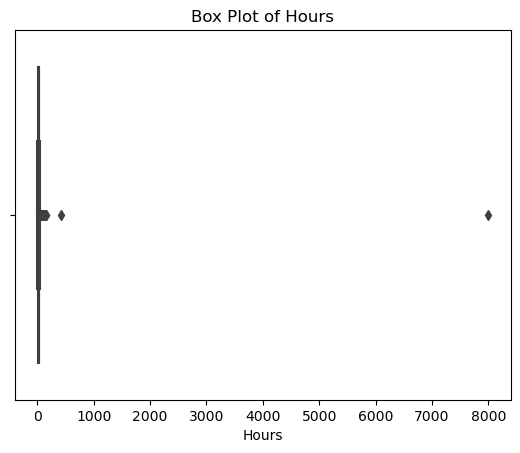

In [7]:
sns.boxplot(x=gamingAnxiety_df['Hours'])
plt.title('Box Plot of Hours')
plt.show()

Because there are extreme outliers present that may skew the mean, we will opt to impute according to the median. 

In [8]:
columns_to_impute = ['Hours']

for column in columns_to_impute:
    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(gamingAnxiety_df[column].median())

Let's verify that we've successfully performed the imputation:

In [9]:
gamingAnxiety_df[nullVariables].isnull().sum()

GADE                649
Hours                 0
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Work                 38
Degree             1577
Reference            15
SPIN_T              650
Residence_ISO3      110
Birthplace_ISO3     121
dtype: int64

Columns Narcisssim and SPIN_T are numerical columns without outliers and are safe to impute according to the mean.

In [10]:
columns_to_impute = ['Narcissism', 'SPIN_T']

for column in columns_to_impute:
    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(gamingAnxiety_df[column].mean())


Let's verify that we've successfully performed the imputation:

In [11]:
gamingAnxiety_df[nullVariables].isnull().sum()

GADE                649
Hours                 0
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism            0
Work                 38
Degree             1577
Reference            15
SPIN_T                0
Residence_ISO3      110
Birthplace_ISO3     121
dtype: int64

We cannot use mean imputation for our categorical variables. We would also rather not drop them, for the same reason we do not want to drop our numerical variables. One method of imputation compatible with categorical values we can use is mode imputation. We impute according to the mode below:

In [12]:
columns_to_impute = ['GADE', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 
                     'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 
                     'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 
                     'SPIN16', 'SPIN17', 'Work', 'Degree', 'Reference',
                     'Residence_ISO3', 'Birthplace_ISO3']

for column in columns_to_impute:
    mode_value = gamingAnxiety_df[column].mode().iloc[0]
    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(mode_value)

And again verify that we've successfully imputed the categorical variables we've targetted:

In [13]:
gamingAnxiety_df[nullVariables].isnull().sum()

GADE               0
Hours              0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Work               0
Degree             0
Reference          0
SPIN_T             0
Residence_ISO3     0
Birthplace_ISO3    0
dtype: int64

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in understanding the characteristics and underlying patterns in our dataset. In this study, we conducted a comprehensive EDA to explore the psychological measures of anxiety, life satisfaction, and social phobia among gamers worldwide. 

In [14]:
gamingAnxiety_df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Singleplayer,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Multiplayer - online - with strangers,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,32,Employed,Bachelor (or equivalent),Reddit,Singleplayer,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,28,Employed,Bachelor (or equivalent),Reddit,Multiplayer - online - with online acquaintanc...,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,19,Employed,High school diploma (or equivalent),Reddit,Multiplayer - online - with strangers,14,14,13.0,KOR,USA


## I. Distribution of Key Psychological Measures
What is the distribution of anxiety, life satisfaction, and social phobia scores among gamers?

To answer this we take have to take a comprehensive look into the psychological state of the respondents and, to analyze the distribution of three key psychological measures: anxiety scores (GAD_T), life satisfaction scores (SWL_T), and social phobia scores (SPIN_T). First we will construct numerical summaries and measure central tendencies, dispersion and correlation between the variables.  We will then use histograms to visualize the frequency distributions of these measures, as they provide an intuitive way to see how scores are spread across different ranges and to identify common patterns and abnormalities.

### Numerical Summaries:

In [810]:
vars = ['GAD_T', 'SWL_T', 'SPIN_T']

median = gamingAnxiety_df[vars].median().round(2)

mode = gamingAnxiety_df[vars].mode().round(2).iloc[0]  

summary_stats = gamingAnxiety_df[vars].describe().round(2)

summary_stats.loc['median'] = median
summary_stats.loc['mode'] = mode

print("Numerical Summaries of GAD_T, SWL_T and SPIN_T:")
print(summary_stats)


Numerical Summaries of GAD_T, SWL_T and SPIN_T:
           GAD_T     SWL_T    SPIN_T
count   13464.00  13464.00  13464.00
mean        5.21     19.79     19.85
std         4.71      7.23     13.14
min         0.00      5.00      0.00
25%         2.00     14.00     10.00
50%         4.00     20.00     18.00
75%         8.00     26.00     27.00
max        21.00     35.00     68.00
median      4.00     20.00     18.00
mode        0.00     24.00     19.85


From the numerical summaries we can see that GAD_T has the smallest mean at 5.21 with the lowest standard deviation, while SWL_T and SPIN_T respectively have similar means of 19.79 and 19.85, however have have different dispersions with standard deviations of 7.23 and 13.14. We can gleam from this that most respondents have low anxiety scores and phobia scores while having middling life satisfaction scores. We can further confirm this through the histograms below.

### Visualization:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


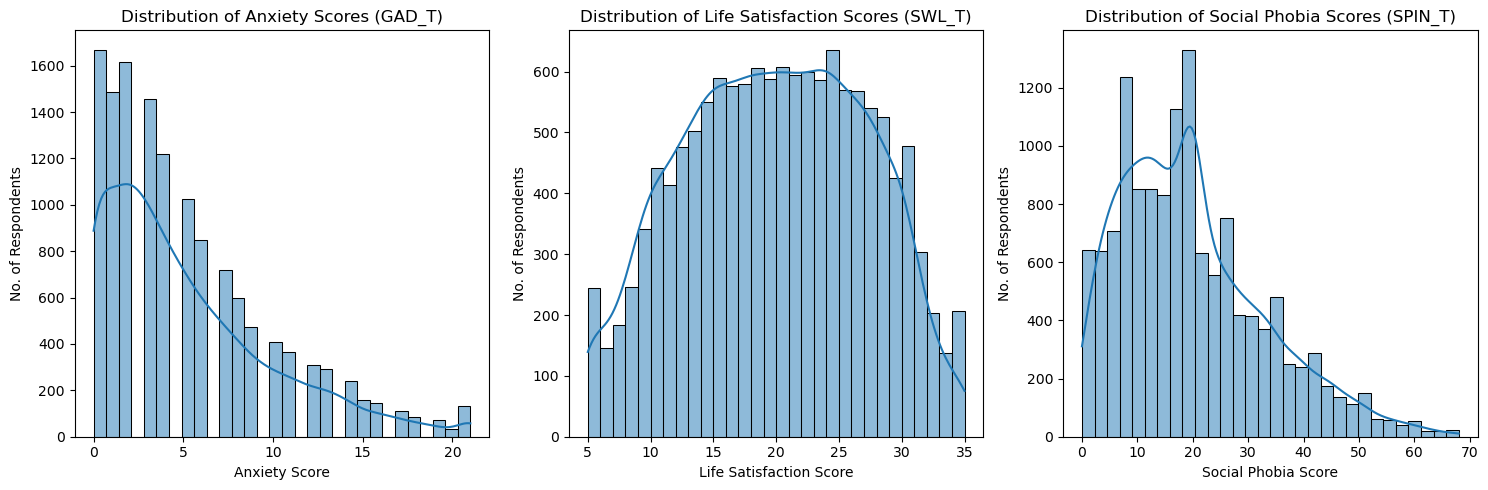

In [811]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['GAD_T'], kde=True, bins=30)
plt.title('Distribution of Anxiety Scores (GAD_T)')
plt.xlabel('Anxiety Score')
plt.ylabel('No. of Respondents')

plt.subplot(1, 3, 2)
sns.histplot(gamingAnxiety_df['SWL_T'], kde=True, bins=30)
plt.title('Distribution of Life Satisfaction Scores (SWL_T)')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('No. of Respondents')

plt.subplot(1, 3, 3)
sns.histplot(gamingAnxiety_df['SPIN_T'], kde=True, bins=30)
plt.title('Distribution of Social Phobia Scores (SPIN_T)')
plt.xlabel('Social Phobia Score')
plt.ylabel('No. of Respondents')

plt.tight_layout()
plt.show()


## Explanation : 
The data given shows that the anxiety frequency distribution has most respondents have lower anxiety score. The distribution of anxiety scores shows that most of the respondents medium to high life satisfaction scores. Lastly, the social phobia scores shows that most respondents have a lower phobia scores, with fewer respondents reporting higher levels of social phobia.

Let's explain it more. For the anxiety frequency distribution or the GAD-T, it shows a right-skewed distribution that indicates most repsondents have lower anxiety scores, The distribution helps us understand that anxiety levels are generally low among the respondents, with some outliers experiencing higher levels of anxiety. We can apply this data by analyzing this distrubtion, we can identify the proportion of respondents experiencing varying degrees of anxiety, which can help in data gathering and usage. For the Life Satisfaction scores, or the SWL_T, the histogram displays the distribution with a slightly left-skewed shape suggesting most respondents have moderate to high life satisfaction, or they're currently happy with their lives right now. This shows that the overall sample of respondents have a overall well-being. Now for the Social Phobia Scores or SPIN_T, the histogram shows the distribution is a right-skewed shape indicating that most repsondents have a lower social phobia score. Showing that social anxiety is not a significant issue for most of the respondents, with only a small minority experiencing high levels of social phobia. 

## Conclusion:
According to the data given, the distribution when it comes to the GAD-T shows that most of the respondents have lower anxiety scores, we can assume that majority of the respondents do not have any problems with anxiety. Same with the others, as the graph shows that the SWL-T although left-skewed shows that majority of the respondents are quite happy with their lives. SPIN-T graphs shows that majority of the respondents do not suffer from social phobia and only a small minority do. 

##  Gaming Hours
Here, we seek to answer the question "Do gaming hours per week correlate with anxiety, life satisfaction, and social phobia scores?"

### Numerical Summaries:

In [812]:
vars = ['Hours', 'GAD_T', 'SWL_T', 'SPIN_T']

median = gamingAnxiety_df[vars].median().round(2)

mode = gamingAnxiety_df[vars].mode().round(2).iloc[0]  

summary_stats = gamingAnxiety_df[vars].describe().round(2)

summary_stats.loc['median'] = median
summary_stats.loc['mode'] = mode

correlations = gamingAnxiety_df[['Hours', 'GAD_T', 'SWL_T', 'SPIN_T']].corr().round(2)

print("Numerical Summaries of GAD_T, SWL_T and SPIN_T:")
print(summary_stats)

print("\nCorrelations between variables:")
print(correlations)

Numerical Summaries of GAD_T, SWL_T and SPIN_T:
           Hours     GAD_T     SWL_T    SPIN_T
count   13464.00  13464.00  13464.00  13464.00
mean       22.24      5.21     19.79     19.85
std        70.21      4.71      7.23     13.14
min         0.00      0.00      5.00      0.00
25%        12.00      2.00     14.00     10.00
50%        20.00      4.00     20.00     18.00
75%        28.00      8.00     26.00     27.00
max      8000.00     21.00     35.00     68.00
median     20.00      4.00     20.00     18.00
mode       20.00      0.00     24.00     19.85

Correlations between variables:
        Hours  GAD_T  SWL_T  SPIN_T
Hours    1.00   0.01  -0.04    0.05
GAD_T    0.01   1.00  -0.40    0.44
SWL_T   -0.04  -0.40   1.00   -0.31
SPIN_T   0.05   0.44  -0.31    1.00


From the numerical summaries we can see that hours has the a median of 20, which is more representative of its average as it has extreme outliers, explaining its high standard deviation of 70.21. Assessing the correlation coefficients between our variables, we can see that none of our variables have correlation coefficients above 0.50, suggesting that there is little to no correlation between them. We can further understand this through scatterplots. 

### Visualization:

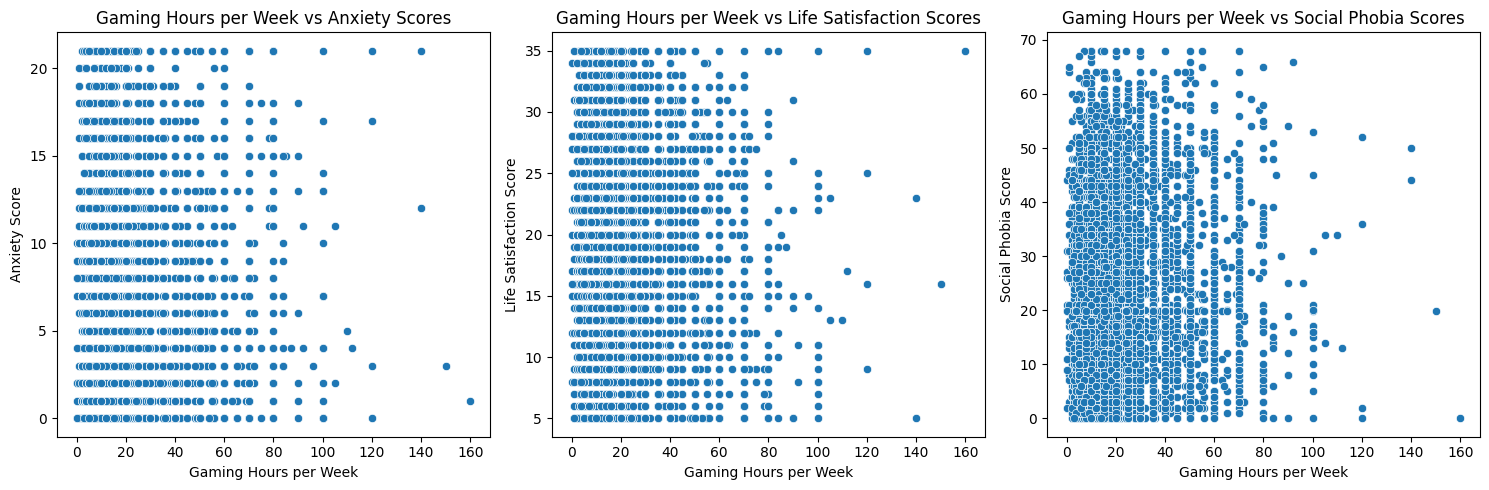

In [813]:
gamingAnxiety_df = gamingAnxiety_df[gamingAnxiety_df['Hours'] <= 200]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Hours', y='GAD_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Anxiety Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Anxiety Score')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Hours', y='SWL_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Life Satisfaction Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Life Satisfaction Score')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Hours', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Social Phobia Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()

## Explanation
Scatterplots are best used when trying to visualize a relationship between two continous variables. Here we attempt to visualize any potential relationship between GAD_T, SPIN_T, and SWL_T.

From visuals alone, there is no obvious trend between gaming hours per week and these variables. One thing of note, however, is that the dots tend to be concentrated towards the left side of the graph. This skewness does indicate that the dataset represents more observations with lower gaming hours per week. Besides this, there is little more that can be gathered from looking at the graph alone.

## Conclusion:
Attempting to visualize potential relationships between gaming hours and anxiety, social phobia, and life satisfaction shows no clear trend. However, the concentration of dots on the left suggests lower gaming hours overall.

## III. Demographic breakdown (Age, Gender, Nationality) of Gamers
What is the demographic breakdown (age, gender, nationality) of gamers in the survey?
For this we can barplot the entire dataset to see the density of the respondents and where they live.

### Numerical Summaries:

In [814]:
vars = ['Age', 'Gender', 'Birthplace_ISO3']

mode = gamingAnxiety_df[vars].mode().iloc[0]

summary_stats_age = gamingAnxiety_df['Age'].describe().round(2)

summary_stats_age['median'] = gamingAnxiety_df['Age'].median().round(2)
summary_stats_age['mode'] = mode['Age']

summary_stats_gender = gamingAnxiety_df['Gender'].value_counts().to_frame(name='count')
summary_stats_birthplace = gamingAnxiety_df['Birthplace_ISO3'].value_counts().to_frame(name='count')

print("Summary Statistics for Age:")
print(summary_stats_age)

print("\nMode for Gender and Birthplace_ISO3:")
print(mode[['Gender', 'Birthplace_ISO3']])

print("\nValue Counts for Gender:")
print(summary_stats_gender)

print("\nValue Counts for Birthplace_ISO3:")
print(summary_stats_birthplace)


Summary Statistics for Age:
count     13462.00
mean         20.93
std           3.30
min          18.00
25%          18.00
50%          20.00
75%          22.00
max          63.00
median       20.00
mode         18.00
Name: Age, dtype: float64

Mode for Gender and Birthplace_ISO3:
Gender             Male
Birthplace_ISO3     USA
Name: 0, dtype: object

Value Counts for Gender:
        count
Gender       
Male    12699
Female    713
Other      50

Value Counts for Birthplace_ISO3:
                 count
Birthplace_ISO3       
USA               4380
DEU               1376
GBR                940
CAN                842
NLD                503
...                ...
LIE                  1
VCT                  1
GIB                  1
BRN                  1
MAC                  1

[124 rows x 1 columns]


From the numerical summaries we can see that most respondents are age 18-21, Male and reside in the USA. There is an abundance of male respondents, with 12699 males outnumbering 713 females, with an extreme minority of respondents listed as 'Other'. The spread of nationalities is similar to the two, with USA respondents outnumbering the second highest answered nationality, Germany, at 4380 to 1376. We can further understand these demographics through a barplot.

### Visualization:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


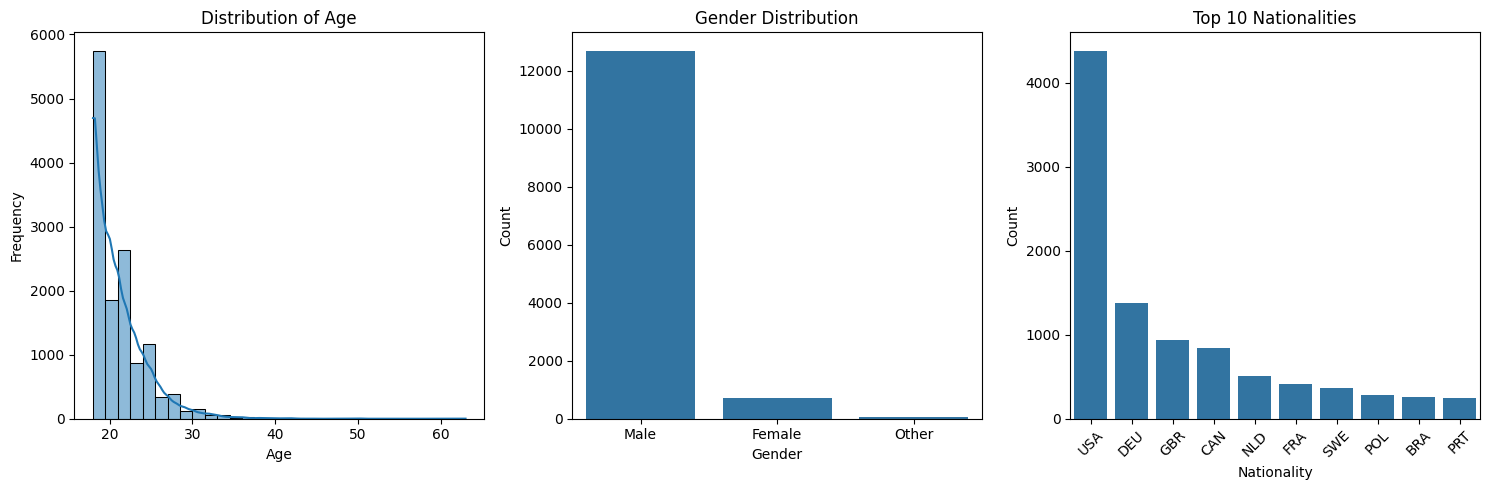

In [815]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=gamingAnxiety_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
top_nationalities = gamingAnxiety_df['Birthplace_ISO3'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Explanation
With the first graph being the age distribution we can see that the majority of the respondents are in their mid-20s, with fewer respondents on the outliers, being younger and older age extremes. The second graph shows the counts of male, female and other respondents. It is apparent that the respondents of this dataset is majorly males, with smaller proportions of female and other genders. The last graph being the top 10 nationalities of respondents. These are namely USA, Germany, UK, Canada, Netherlands, France, Sweden, Poland, Brazil and Portugal.

Let's dive in deeper in the graphs. The first graph shows that the peak respondent age is mid-20s, this shows that the age group is highly represented in this sampling, then we have more extremes reaching up to 60, showing that gaming is not a phase but a passion for some people. The second graph shows that majority of the respondents are male, we can use this for mental health data research and in indentifying target demographics. The last graph is again, the Top 10 Nationalities, showing USA as first, then Germany. The data also shows that 80% of the Top 10 countries are in Europe.


## Conclusion
The vast majoriy of gamers from the dataset are below the age of 20, Male, and from the USA.

## IV. Distribution of Preferred Gaming Device, Game Genre, and Psychological Measures

### Numerical Summaries:

In [816]:
vars = ['Platform', 'Game', 'GAD_T', 'SWL_T', 'SPIN_T']

mode = gamingAnxiety_df[vars].mode().iloc[0]

numerical_vars = ['GAD_T', 'SWL_T', 'SPIN_T']
summary_stats_numerical = gamingAnxiety_df[numerical_vars].describe().round(2)

median = gamingAnxiety_df[numerical_vars].median().round(2)

summary_stats_numerical.loc['median'] = median
summary_stats_numerical.loc['mode'] = mode[numerical_vars]
summary_stats_numerical = summary_stats_numerical.round(2)
summary_stats_platform = gamingAnxiety_df['Platform'].value_counts().to_frame(name='count')
summary_stats_game = gamingAnxiety_df['Game'].value_counts().to_frame(name='count')

print("Summary Statistics for Numerical Variables:")
print(summary_stats_numerical)

print("\nMode for Categorical Variables:")
print(mode[['Platform', 'Game']])

print("\nValue Counts for Platform:")
print(summary_stats_platform)

print("\nValue Counts for Game:")
print(summary_stats_game)

Summary Statistics for Numerical Variables:
           GAD_T     SWL_T    SPIN_T
count   13462.00  13462.00  13462.00
mean        5.21     19.79     19.85
std         4.71      7.23     13.13
min         0.00      5.00      0.00
25%         2.00     14.00     10.00
50%         4.00     20.00     18.00
75%         8.00     26.00     27.00
max        21.00     35.00     68.00
median      4.00     20.00     18.00
mode        0.00     24.00     19.85

Mode for Categorical Variables:
Platform                   PC
Game        League of Legends
Name: 0, dtype: object

Value Counts for Platform:
                         count
Platform                      
PC                       13218
Console (PS, Xbox, ...)    222
Smartphone / Tablet         22

Value Counts for Game:
                     count
Game                      
League of Legends    11313
Other                 1020
Starcraft 2            345
Counter Strike         318
World of Warcraft      152
Hearthstone            101
Diablo 3  

From the numerical summaries we can see that most respondents play on PC and play League of Legends. PC players outnumber the second closest platform, console players at 13218 to 222. Similarly, League of Legends players have the highest number of respondents playing it, with the closest second being 'Other', suggesting 1020 players play a game that might not be listed in the survey. We can understand these statistics better through boxplots.

### Visualization:

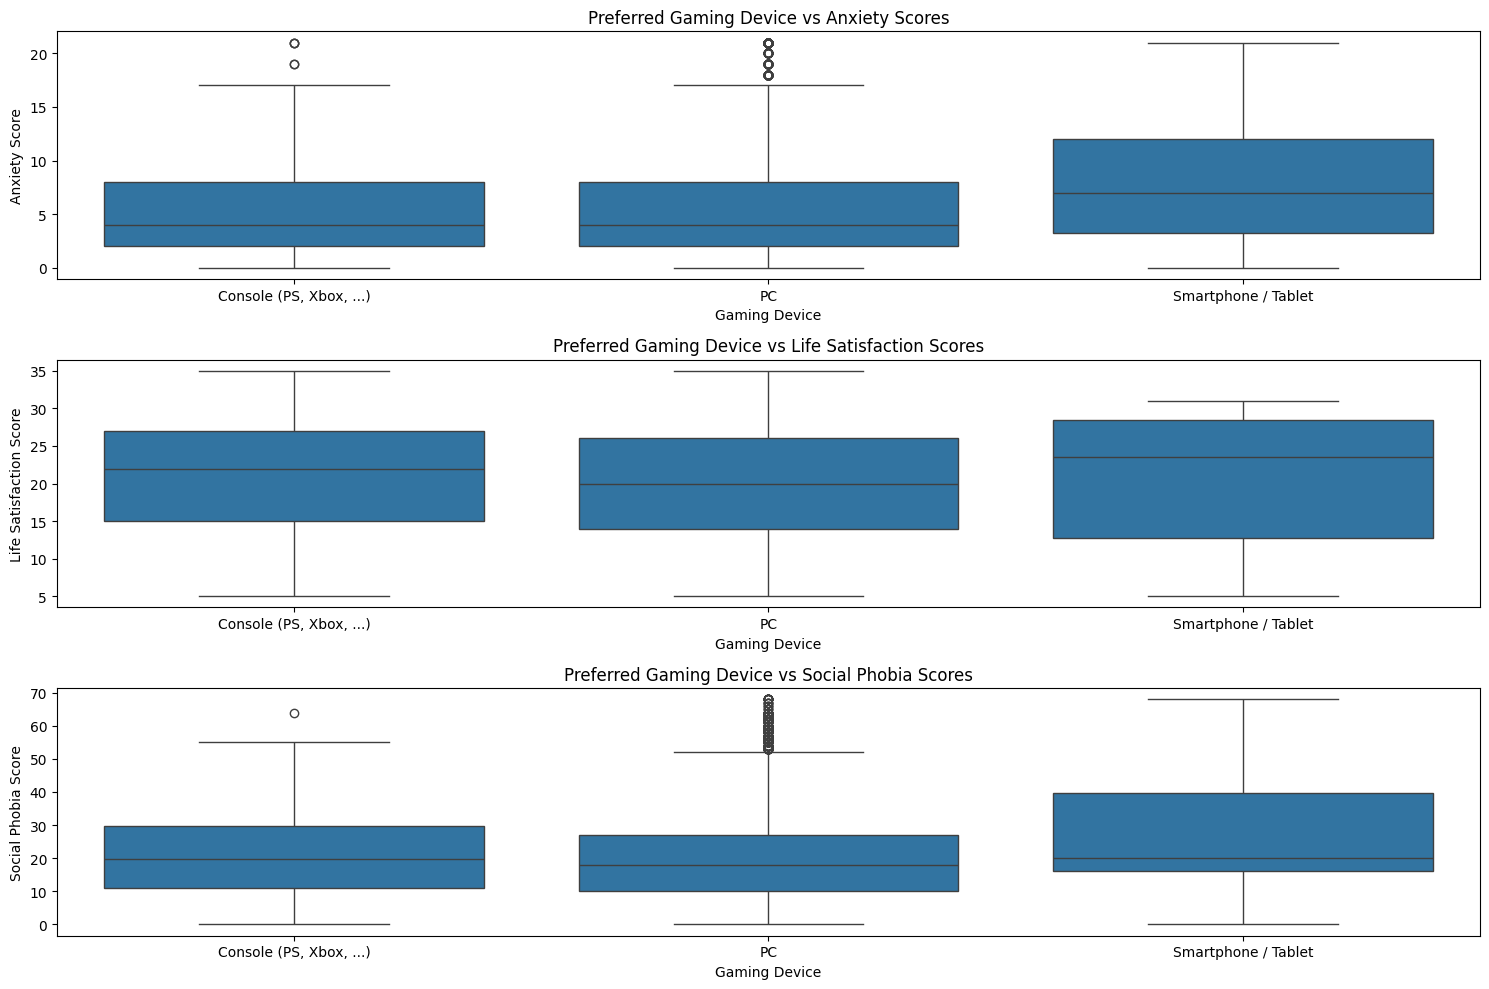

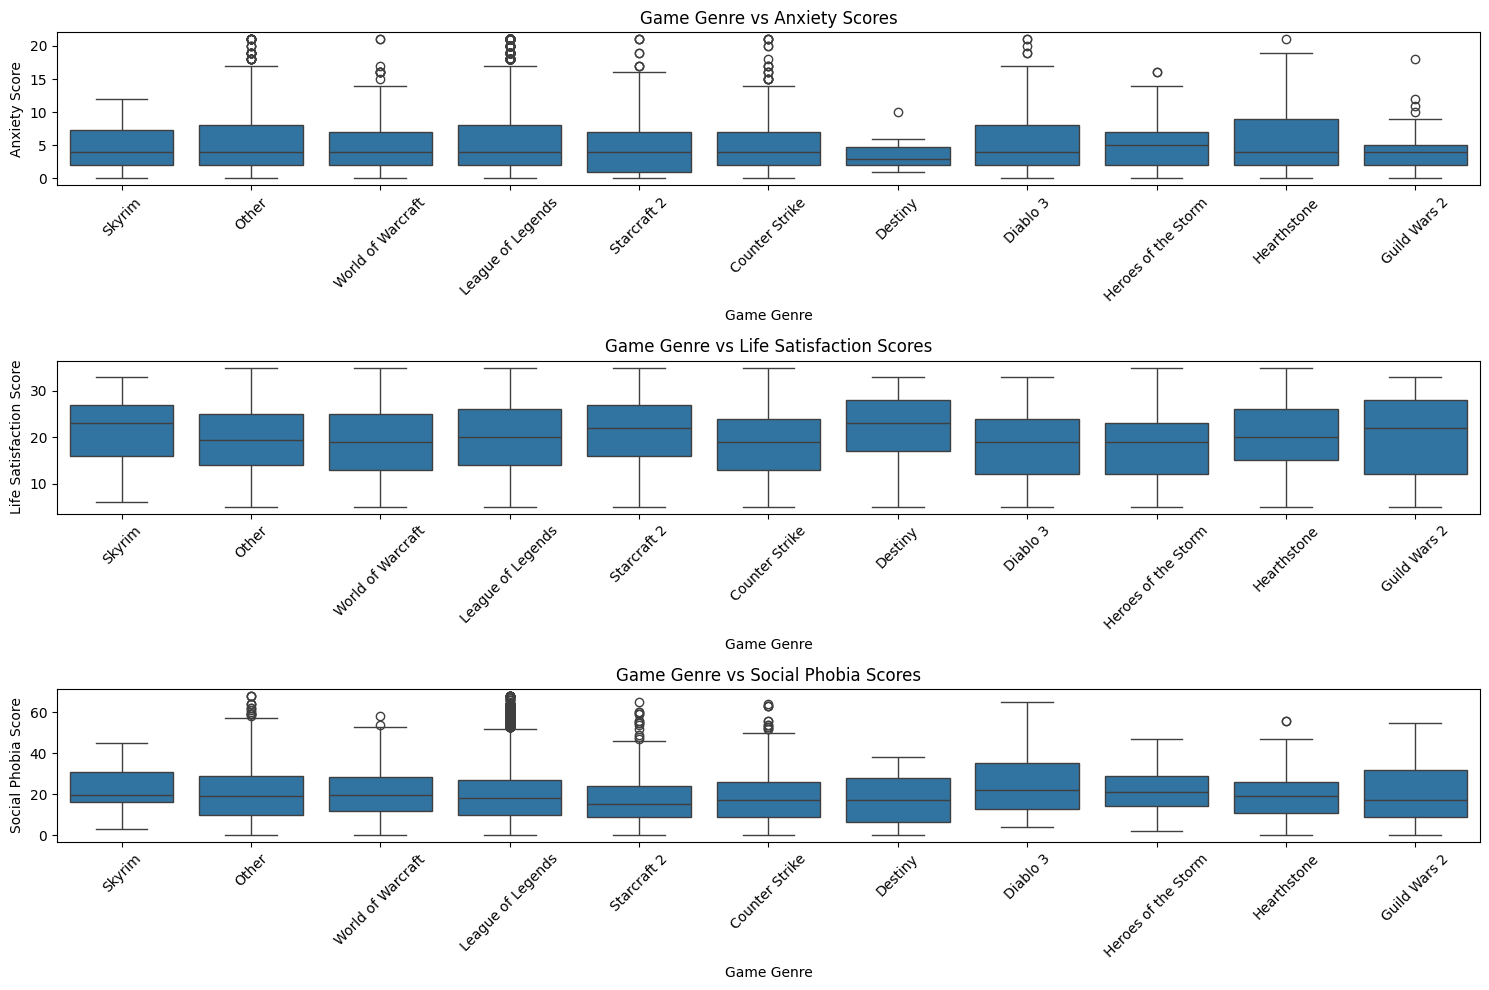

In [817]:
# Preferred gaming device and psychological measures
plt.figure(figsize=(15, 10))

# Device vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Platform', y='GAD_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Anxiety Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Anxiety Score')

# Device vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Platform', y='SWL_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Life Satisfaction Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Life Satisfaction Score')

# Device vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Platform', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Social Phobia Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()

# Game genre and psychological measures
plt.figure(figsize=(15, 10))

# Genre vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Game', y='GAD_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Anxiety Scores')
plt.xlabel('Game Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45)

# Genre vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Game', y='SWL_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Life Satisfaction Scores')
plt.xlabel('Game Genre')
plt.ylabel('Life Satisfaction Score')
plt.xticks(rotation=45)

# Genre vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Game', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Social Phobia Scores')
plt.xlabel('Game Genre')
plt.ylabel('Social Phobia Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Explanation:
A boxplot is extremely useful here as it displays a range of data and highlights central tendency, and how differeng genres and platforms may affect these.

The graph shows that in mobile users tend to have GAD_T, SWL_T and SPIN_T scores compared to PC and console users. Interestingly, PC players noticeably have more outliers compared to the rest, leaning towards high GAD_T and SPIN_T.

Though there are differences in the median scores, the most striking observations about the game genre graphs are the high amount of outliers presenting high GAD_T and high SPIN_T scores for games like League of Legends and Counter Strike, games known to be highly competitive. This may present an opportunity for feature engineering, classifying the games with regards to how competitive they are.

## Conclusion:

Anxiety, Social Phobia and Satisfaction with life tends to be higher for mobile users. High-score outliers are also noticeable with regards to social phobia and anxiety for competitive games.

### Research Question
After going through the Exploratory Data Analysis, our final research question is as follows:
- **How do different gaming devices and genres impact gaming-related anxiety levels among different demographic groups?**

## Data Modelling

## Statistical Inference